In [33]:
! pip install sqlalchemy
! pip install psycopg2
! pip install flask


%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
from config import db_password

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

import datetime as dt

In [34]:
# Define variable for database connection in PostgreSQL. This is not neded for this application

protocol = "postgres"
user = "postgres"
location = "localhost"
port = "5432"
db = "movie_data"

connection_string = f'{protocol}://{user}:{db_password}@{location}:{port}/{db}'
 


In [35]:
# Engine will specify the location of the SQLite Database

engine = create_engine("sqlite:///hawaii.sqlite") # Rhis is for SQLite only

# Create a base map for an automap schema in SQLAlchemy. This is also a base class known as
# automap_base() function
Base = automap_base()

# Reflect the schema of our SQLite tables into our code and create mappings. By reflecting 
# we create classes that help keep our code separate. Other classes can only interact with a 
# only subsets of data instead of the whole dataset
Base.prepare(engine, reflect = True)

In [36]:
# This will reference all the classes that were mapped in each table
# Base.classes for access to all classes. Keys() give references to 
# allthe names of the classes.

Base.classes.keys()

['measurement', 'station']

In [37]:
# Save references to each table for each table so we don't have to enter them all the time
# Measurement and Station

Measurement = Base.classes.measurement
Station = Base.classes.station



In [38]:
# Create our session (link) from Python to the SQLite Database
session = Session(engine)

BEGIN KEY STATISTICAL DATA FOR THE MONTH OF JUNE

In [39]:


# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
#Starting from the last data point in the database. 

# Calculate the date one year from the last date in data set.
prev_year = dt.date(2017, 6, 1) - dt.timedelta(days = 365)

# Create a variable to store the result of our query. 

June_results = []

# Perform a query to retrieve the data and precipitation scores next
# Save the query results as a Pandas DataFrame and set the index to the date column
June_results = session.query(Measurement.date, Measurement.prcp, Measurement.tobs)

print(June_results.all())

# Sort/Filter the dataframe by date

June_results = session.query(Measurement.date, Measurement.prcp, Measurement.tobs).filter(Measurement.date >= prev_year)

print(June_results)



[('2010-01-01', 0.08, 65.0), ('2010-01-02', 0.0, 63.0), ('2010-01-03', 0.0, 74.0), ('2010-01-04', 0.0, 76.0), ('2010-01-06', None, 73.0), ('2010-01-07', 0.06, 70.0), ('2010-01-08', 0.0, 64.0), ('2010-01-09', 0.0, 68.0), ('2010-01-10', 0.0, 73.0), ('2010-01-11', 0.01, 64.0), ('2010-01-12', 0.0, 61.0), ('2010-01-14', 0.0, 66.0), ('2010-01-15', 0.0, 65.0), ('2010-01-16', 0.0, 68.0), ('2010-01-17', 0.0, 64.0), ('2010-01-18', 0.0, 72.0), ('2010-01-19', 0.0, 66.0), ('2010-01-20', 0.0, 66.0), ('2010-01-21', 0.0, 69.0), ('2010-01-22', 0.0, 67.0), ('2010-01-23', 0.0, 67.0), ('2010-01-24', 0.01, 71.0), ('2010-01-25', 0.0, 67.0), ('2010-01-26', 0.04, 76.0), ('2010-01-27', 0.12, 68.0), ('2010-01-28', 0.0, 72.0), ('2010-01-30', None, 70.0), ('2010-01-31', 0.03, 67.0), ('2010-02-01', 0.01, 66.0), ('2010-02-03', None, 67.0), ('2010-02-04', 0.01, 69.0), ('2010-02-05', 0.0, 67.0), ('2010-02-06', 0.0, 67.0), ('2010-02-07', 0.0, 64.0), ('2010-02-08', 0.0, 69.0), ('2010-02-09', 0.0, 73.0), ('2010-02-11', 

In [40]:
# Save the query results as a Pandas DataFrame and set the index to the date column

# Create DataFrame
June_df = pd.DataFrame(June_results, columns=['date','precipitation', 'temperature']) # Here date is not index


# Set index to the date column (That way we dont have to recreate a new DataFrame)
June_df.set_index(June_df['date'], inplace=False)

print(June_df)

            date  precipitation  temperature
0     2016-06-01           0.06         76.0
1     2016-06-02           0.00         71.0
2     2016-06-03           0.00         71.0
3     2016-06-04           0.00         74.0
4     2016-06-05           0.00         76.0
...          ...            ...          ...
2748  2017-08-19           0.09         71.0
2749  2017-08-20            NaN         78.0
2750  2017-08-21           0.56         76.0
2751  2017-08-22           0.50         76.0
2752  2017-08-23           0.45         76.0

[2753 rows x 3 columns]


In [41]:
# Convert DataFrame to strings, then set index to False. This will allow 
# us to print the DataFrame without confusing double date column

print(June_df.to_string(index=False))

       date  precipitation  temperature
 2016-06-01           0.06         76.0
 2016-06-02           0.00         71.0
 2016-06-03           0.00         71.0
 2016-06-04           0.00         74.0
 2016-06-05           0.00         76.0
 2016-06-06           0.00         78.0
 2016-06-07           0.01         77.0
 2016-06-08           0.00         77.0
 2016-06-09           0.01         73.0
 2016-06-10           0.05         77.0
 2016-06-11           0.00         78.0
 2016-06-12           0.01         78.0
 2016-06-13           0.00         80.0
 2016-06-14           0.00         79.0
 2016-06-15           0.01         78.0
 2016-06-16           0.02         77.0
 2016-06-17           0.02         76.0
 2016-06-18           0.00         77.0
 2016-06-19           0.01         77.0
 2016-06-20           0.01         78.0
 2016-06-21           0.00         80.0
 2016-06-22           0.00         79.0
 2016-06-23           0.00         79.0
 2016-06-24           0.01         77.0


In [42]:
# Sort the values by date using the sort_index() function. Then print with index set to False

June_df+June_df.sort_index()

print(June_df.to_string(index=False))



       date  precipitation  temperature
 2016-06-01           0.06         76.0
 2016-06-02           0.00         71.0
 2016-06-03           0.00         71.0
 2016-06-04           0.00         74.0
 2016-06-05           0.00         76.0
 2016-06-06           0.00         78.0
 2016-06-07           0.01         77.0
 2016-06-08           0.00         77.0
 2016-06-09           0.01         73.0
 2016-06-10           0.05         77.0
 2016-06-11           0.00         78.0
 2016-06-12           0.01         78.0
 2016-06-13           0.00         80.0
 2016-06-14           0.00         79.0
 2016-06-15           0.01         78.0
 2016-06-16           0.02         77.0
 2016-06-17           0.02         76.0
 2016-06-18           0.00         77.0
 2016-06-19           0.01         77.0
 2016-06-20           0.01         78.0
 2016-06-21           0.00         80.0
 2016-06-22           0.00         79.0
 2016-06-23           0.00         79.0
 2016-06-24           0.01         77.0


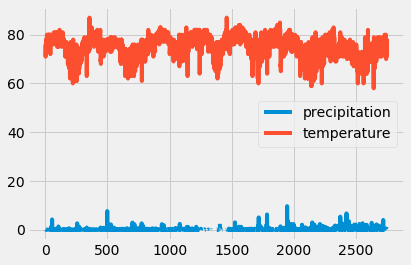

In [43]:


June_df.plot()

In [44]:
# Use Pandas to calcualte the summary statistics for the precipitation and temperature data
# Generate the Summary using .describe() method
# Mean, Variance, Standard Deviation, Minimum, Maximum, Percentiles and Count

June_df.describe()


,precipitation,temperature
count,2484.000000,2753.000000
mean,0.199300,75.010171
std,0.536388,4.463992
min,0.000000,58.000000
25%,0.000000,72.000000
50%,0.020000,76.000000
75%,0.150000,78.000000
max,9.640000,87.000000


In [13]:
# Determine or find the number of stations

session.query(func.count(Station.station)).all()

# How many stations are available in this dataset?


[(9)]

In [61]:
# Determine the most active stations
# Output - In the left column is the station ID, and on the right are the counts 
# for each station. The counts indicate which stations are most active. We can also see which
# stations are the least active.
# List the stations and the counts in descending order.
# add the method .all() to return the result of all the query so far
session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [48]:
 
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?


# With the minimum, maximum, and average in our query, we now need to add one filter.
# If you look at the outcome of the previous query, you can see that the most active station is USC00519281. Therefore, we will need to add
# this station ID to our filter below.


session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)) #.\
 





In [56]:
#

# Now filter out all the stations except the most active station. We need to 
# apply another filter to consider only the most recent year. For this we can reuse
# some of the code we have written previously. Then we’ll add the .all() function
# to save our results as a list.

June_results = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs),(Measurement.prcp))


print(June_results)

SELECT min(measurement.tobs) AS min_1, max(measurement.tobs) AS max_1, avg(measurement.tobs) AS avg_1, measurement.prcp AS measurement_prcp 
FROM measurement


BEGIN KEY STATISTICAL DATA FOR THE MONTH OF DECEMBER

In [82]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
#Starting from the last data point in the database. 

# Calculate the date one year from the last d
# Create a variable to store the result of our queryate in data set.
prev_year = dt.date(2017, 12, 1) - dt.timedelta(days = 365)


December_results = []

# Perform a query to retrieve the data and precipitation scores next
# Save the query results as a Pandas DataFrame and set the index to the date column
December_results = session.query(Measurement.date, Measurement.prcp, Measurement.tobs)

print(December_results.all())

# Sort/Filter the dataframe by date

December_results = session.query(Measurement.date, Measurement.prcp, Measurement.tobs).filter(Measurement.date >= prev_year)

print(December_results)


[('2010-01-01', 0.08, 65.0), ('2010-01-02', 0.0, 63.0), ('2010-01-03', 0.0, 74.0), ('2010-01-04', 0.0, 76.0), ('2010-01-06', None, 73.0), ('2010-01-07', 0.06, 70.0), ('2010-01-08', 0.0, 64.0), ('2010-01-09', 0.0, 68.0), ('2010-01-10', 0.0, 73.0), ('2010-01-11', 0.01, 64.0), ('2010-01-12', 0.0, 61.0), ('2010-01-14', 0.0, 66.0), ('2010-01-15', 0.0, 65.0), ('2010-01-16', 0.0, 68.0), ('2010-01-17', 0.0, 64.0), ('2010-01-18', 0.0, 72.0), ('2010-01-19', 0.0, 66.0), ('2010-01-20', 0.0, 66.0), ('2010-01-21', 0.0, 69.0), ('2010-01-22', 0.0, 67.0), ('2010-01-23', 0.0, 67.0), ('2010-01-24', 0.01, 71.0), ('2010-01-25', 0.0, 67.0), ('2010-01-26', 0.04, 76.0), ('2010-01-27', 0.12, 68.0), ('2010-01-28', 0.0, 72.0), ('2010-01-30', None, 70.0), ('2010-01-31', 0.03, 67.0), ('2010-02-01', 0.01, 66.0), ('2010-02-03', None, 67.0), ('2010-02-04', 0.01, 69.0), ('2010-02-05', 0.0, 67.0), ('2010-02-06', 0.0, 67.0), ('2010-02-07', 0.0, 64.0), ('2010-02-08', 0.0, 69.0), ('2010-02-09', 0.0, 73.0), ('2010-02-11', 

In [83]:
# Save the query results as a Pandas DataFrame and set the index to the date column

# Create a DataFrame
December_df = pd.DataFrame(December_results, columns=['date','precipitation', 'temperature']) # Here date is not index


# Set index to the date column (That way we dont have to recreate a new DataFrame)
December_df.set_index(December_df['date'], inplace=False)

print(December_df)

            date  precipitation  temperature
0     2016-12-01           0.12         75.0
1     2016-12-02           0.03         72.0
2     2016-12-03           0.00         69.0
3     2016-12-04           0.03         71.0
4     2016-12-05           0.43         68.0
...          ...            ...          ...
1592  2017-08-19           0.09         71.0
1593  2017-08-20            NaN         78.0
1594  2017-08-21           0.56         76.0
1595  2017-08-22           0.50         76.0
1596  2017-08-23           0.45         76.0

[1597 rows x 3 columns]


In [84]:
# Sort the values by date using the sort_index() function. Then print with index set to False

December_df+December_df.sort_index()

print(December_df.to_string(index=False))



       date  precipitation  temperature
 2016-12-01           0.12         75.0
 2016-12-02           0.03         72.0
 2016-12-03           0.00         69.0
 2016-12-04           0.03         71.0
 2016-12-05           0.43         68.0
 2016-12-06           0.02         67.0
 2016-12-07           0.00         69.0
 2016-12-08           0.03         73.0
 2016-12-09           0.52         70.0
 2016-12-10           0.05         70.0
 2016-12-11           0.04         70.0
 2016-12-12           0.01         66.0
 2016-12-13           0.05         67.0
 2016-12-14           0.03         70.0
 2016-12-15           0.00         66.0
 2016-12-16           0.00         62.0
 2016-12-17           0.01         71.0
 2016-12-18           0.13         73.0
 2016-12-19           0.01         69.0
 2016-12-20           0.00         77.0
 2016-12-21           0.00         74.0
 2016-12-22           0.01         71.0
 2016-12-23           0.01         72.0
 2016-12-24           0.01         74.0


In [85]:
# Save the query results as a Pandas DataFrame and set the index to the date column

# Create DataFrame
December_df = pd.DataFrame(December_results, columns=['date','precipitation', 'temperature']) # Here date is not index


# Set index to the date column (That way we dont have to recreate a new DataFrame)
December_df.set_index(December_df['date'], inplace= False)

print(December_df)

            date  precipitation  temperature
0     2016-12-01           0.12         75.0
1     2016-12-02           0.03         72.0
2     2016-12-03           0.00         69.0
3     2016-12-04           0.03         71.0
4     2016-12-05           0.43         68.0
...          ...            ...          ...
1592  2017-08-19           0.09         71.0
1593  2017-08-20            NaN         78.0
1594  2017-08-21           0.56         76.0
1595  2017-08-22           0.50         76.0
1596  2017-08-23           0.45         76.0

[1597 rows x 3 columns]


In [86]:
# Convert DataFrame to strings, then set index to False. This will allow 
# us to print the DataFrame without confusing double date column

print(December_df.to_string(index=False))

       date  precipitation  temperature
 2016-12-01           0.12         75.0
 2016-12-02           0.03         72.0
 2016-12-03           0.00         69.0
 2016-12-04           0.03         71.0
 2016-12-05           0.43         68.0
 2016-12-06           0.02         67.0
 2016-12-07           0.00         69.0
 2016-12-08           0.03         73.0
 2016-12-09           0.52         70.0
 2016-12-10           0.05         70.0
 2016-12-11           0.04         70.0
 2016-12-12           0.01         66.0
 2016-12-13           0.05         67.0
 2016-12-14           0.03         70.0
 2016-12-15           0.00         66.0
 2016-12-16           0.00         62.0
 2016-12-17           0.01         71.0
 2016-12-18           0.13         73.0
 2016-12-19           0.01         69.0
 2016-12-20           0.00         77.0
 2016-12-21           0.00         74.0
 2016-12-22           0.01         71.0
 2016-12-23           0.01         72.0
 2016-12-24           0.01         74.0


In [77]:
# add the method .all() to return the result of all the query so far

# Output - In the left column is the station ID, and on the right are the counts 
# for each station. The counts indicate which stations are most active. We can also see which
# stations are the least active.

session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [78]:
December_results = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs), Measurement.prcp)


print(December_results)

SELECT min(measurement.tobs) AS min_1, max(measurement.tobs) AS max_1, avg(measurement.tobs) AS avg_1, measurement.prcp AS measurement_prcp 
FROM measurement


In [87]:
December_df.describe()

,precipitation,temperature
count,1445.000000,1597.000000
mean,0.170062,73.766437
std,0.441790,4.867794
min,0.000000,58.000000
25%,0.000000,70.000000
50%,0.010000,74.000000
75%,0.120000,77.000000
max,6.250000,87.000000
